In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz
from scipy import optimize

In [99]:
def gauss(x,sigma,mu,factor,cost):
    return (factor*(1/(sigma*(2*np.pi)**.5))*np.exp(-(x-mu)**2/(2*sigma**2))+cost)
L=[]

6.711538461538462
The gaussian parameters (𝜇 ± 𝜎) for the D2882 are: 5.81 ± 1.66 



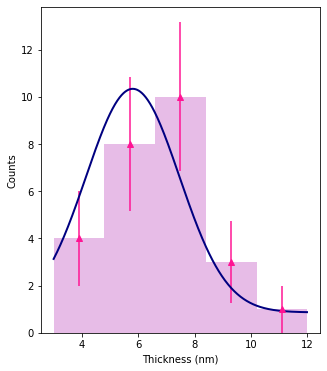

In [100]:
x = np.loadtxt('D2883.txt')
print(x.mean())
counts, bis = np.histogram(x, bins=5)
step=bis[1]-bis[0]
x_fit = np.arange(3, 12, 0.01) 
as_x = .5*(bis[1:]+bis[:-1])
fig= plt.figure(figsize=(5, 6))
plt.xlabel('Thickness (nm)')
plt.ylabel('Counts')
yerror=np.sqrt(counts)
plt.hist(x, bins=5, color='plum', alpha=0.7)
plt.errorbar(as_x, counts, yerr=yerror, errorevery=1, fmt='^', color='deeppink')
params, covariance = optimize.curve_fit(gauss, bis[:-1], counts, p0=[3, 6, 10, 0])
plt.plot(x_fit, gauss(x_fit,*params), '-', color = 'navy', lw = 2, label = 'Gaussian fit')
print('The gaussian parameters (𝜇 ± 𝜎) for the D2882 are:', round(params[1],2),'±', round(params[0],2), '\n') 
L.append([round(params[1],2),round(params[0],2)])

12.425925925925926
The gaussian parameters (𝜇 ± 𝜎) for the D2882 are: 10.01 ± 2.92 



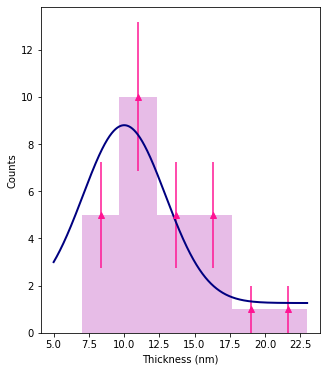

In [101]:
x = np.loadtxt('D2882.txt')
print(x.mean())
counts, bis = np.histogram(x, bins=6)
step=bis[1]-bis[0]
x_fit = np.arange(5, 23, 0.01) 
as_x = .5*(bis[1:]+bis[:-1])
fig= plt.figure(figsize=(5, 6))
plt.xlabel('Thickness (nm)')
plt.ylabel('Counts')
yerror=np.sqrt(counts)
plt.hist(x, bins=6, color='plum', alpha=0.7)
plt.errorbar(as_x, counts, yerr=yerror, errorevery=1, fmt='^', color='deeppink')
params, covariance = optimize.curve_fit(gauss, bis[:-1], counts, p0=[5, 11, 100, 0])
plt.plot(x_fit, gauss(x_fit,*params), '-', color = 'navy', lw = 2, label = 'Gaussian fit')
print('The gaussian parameters (𝜇 ± 𝜎) for the D2882 are:', round(params[1],2),'±', round(params[0],2), '\n') 
L.append([round(params[1],2),round(params[0],2)])

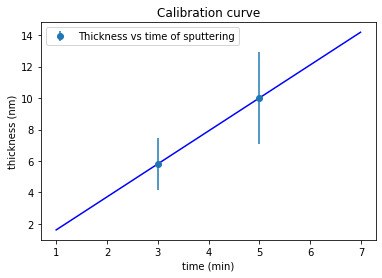

So it is expected to have for 1 min of sputtering 1.61 nm ca.


In [112]:
x=[3,5]
y=[L[0][0],L[1][0]]
m, b = np.polyfit(x, y, 1)
yerror =[L[0][1],L[1][1]]
plt.errorbar(x, y, yerr=yerror, errorevery=1, fmt='o',label='Thickness vs time of sputtering')
x_fit = np.arange(1, 7, 0.01) 
plt.plot(x_fit, m*x_fit + b, 'blue')
plt.title('Calibration curve')
plt.xlabel('time (min)')
plt.ylabel('thickness (nm)')
plt.legend()
plt.show()
print('So it is expected to have for 1 min of sputtering', round(m*1 + b,2), 'nm ca.') 